<a href="https://colab.research.google.com/github/Gabriel-Mourad/Practica_1_INAM/blob/main/Gabriel_Mourad_INAM_Block_1_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1
The second exercise is focused in another classical dataset, the Boston house price. It contains information from different houses in Boston and is commonly used as the typical regression problem.
First of all we are going to download the data and sotre it in the houses_dataset variable and then provide instructions that will solve different questions that can help us in order to do an exploration of the data. Some parts are left blank in order to be answered.

Information about the dataset can be found in the following repository:
[Boston Housing dataset url](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import describe

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

--2022-03-22 08:56:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [application/x-httpd-php]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.1s    

2022-03-22 08:56:35 (448 KB/s) - ‘housing.data’ saved [49082/49082]



In [ ]:
# Reading the file and storing it into the iris_dataset variable.
with open("housing.data") as data:
  house_dataset = data.read().strip()
type(house_dataset)

str

In [ ]:
list_of_rows = house_dataset.split("\n")
print(list_of_rows[:3])

['0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00', ' 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60', ' 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70']


Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. BK        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. PRICE     Median value of owner-occupied homes in $1000's

In [ ]:
np.set_printoptions(suppress=True)
data = []
labels_map = {}
columns_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
                 "RAD", "TAX", "PTRATIO", "BK", "LSTAT", "PRICE"]
columns_dict = {column_name:[] for column_name in columns_names}
integer_id = 0
for sequence in list_of_rows:
  elements = [float(element) for element in sequence.split(" ") if element!=""]
  for i, element in enumerate(elements):
    columns_dict[columns_names[i]].append(float(element))

dataset = np.array([column for column in columns_dict.values()]).T
print(f"Matrix shape: {dataset.shape}")
print(f"First 5 samples: {dataset[:5,:]}")


Matrix shape: (506, 14)
First 5 samples: [[  0.00632  18.        2.31      0.        0.538     6.575    65.2
    4.09      1.      296.       15.3     396.9       4.98     24.     ]
 [  0.02731   0.        7.07      0.        0.469     6.421    78.9
    4.9671    2.      242.       17.8     396.9       9.14     21.6    ]
 [  0.02729   0.        7.07      0.        0.469     7.185    61.1
    4.9671    2.      242.       17.8     392.83      4.03     34.7    ]
 [  0.03237   0.        2.18      0.        0.458     6.998    45.8
    6.0622    3.      222.       18.7     394.63      2.94     33.4    ]
 [  0.06905   0.        2.18      0.        0.458     7.147    54.2
    6.0622    3.      222.       18.7     396.9       5.33     36.2    ]]


In [ ]:
#Separated features and response columns
features = dataset[:,:-1]
response = dataset[:,-1]


In [ ]:
# Storing the data into a dataframe
df_houses = pd.DataFrame(dataset, columns=columns_names)
df_houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BK,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* What is the number of variables (features) in the Boston Houses dataset (remember that the last one is the price)?

In [ ]:
# El resultado muestra como hay 14 columnas, cada una corresponde a una característica del conjunto de caso. 
# Como el precio es la variable o característica independiente, las otras 13 variables son dependientes. 
print(df_houses.columns)


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BK', 'LSTAT', 'PRICE'],
      dtype='object')


* What is the number of samples (observations)?


In [ ]:
# El resultado muestra como las filas del dataset son 506, cada fila corresponde a una observación.
print(f"Matrix shape: {dataset.shape}")


Matrix shape: (506, 14)


What's the main difference between this dataset and the previous one? (Hint: No classes in this one).

*(Answer)*
En el conjunto de datos de las flores Iris, se asignaba a cada conjunto de observaciones una clase, por lo tanto, se debe solucionar un problema de clasificación. En el conjunto de datos de Boston Housing cada conjunto de observaciones corresponde a una característica de la casa, y se usan 13 de estas características para predecir otra característica más de la casa, el precio. Este es un problema de regresión.

* Are there any feature with missing values?

In [ ]:

df_houses.info() 
np.sum(np.isnan(dataset, where=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BK       506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


0

* Show scatterplots between the features of our dataset and the PRICE variable
using the seaborn library:


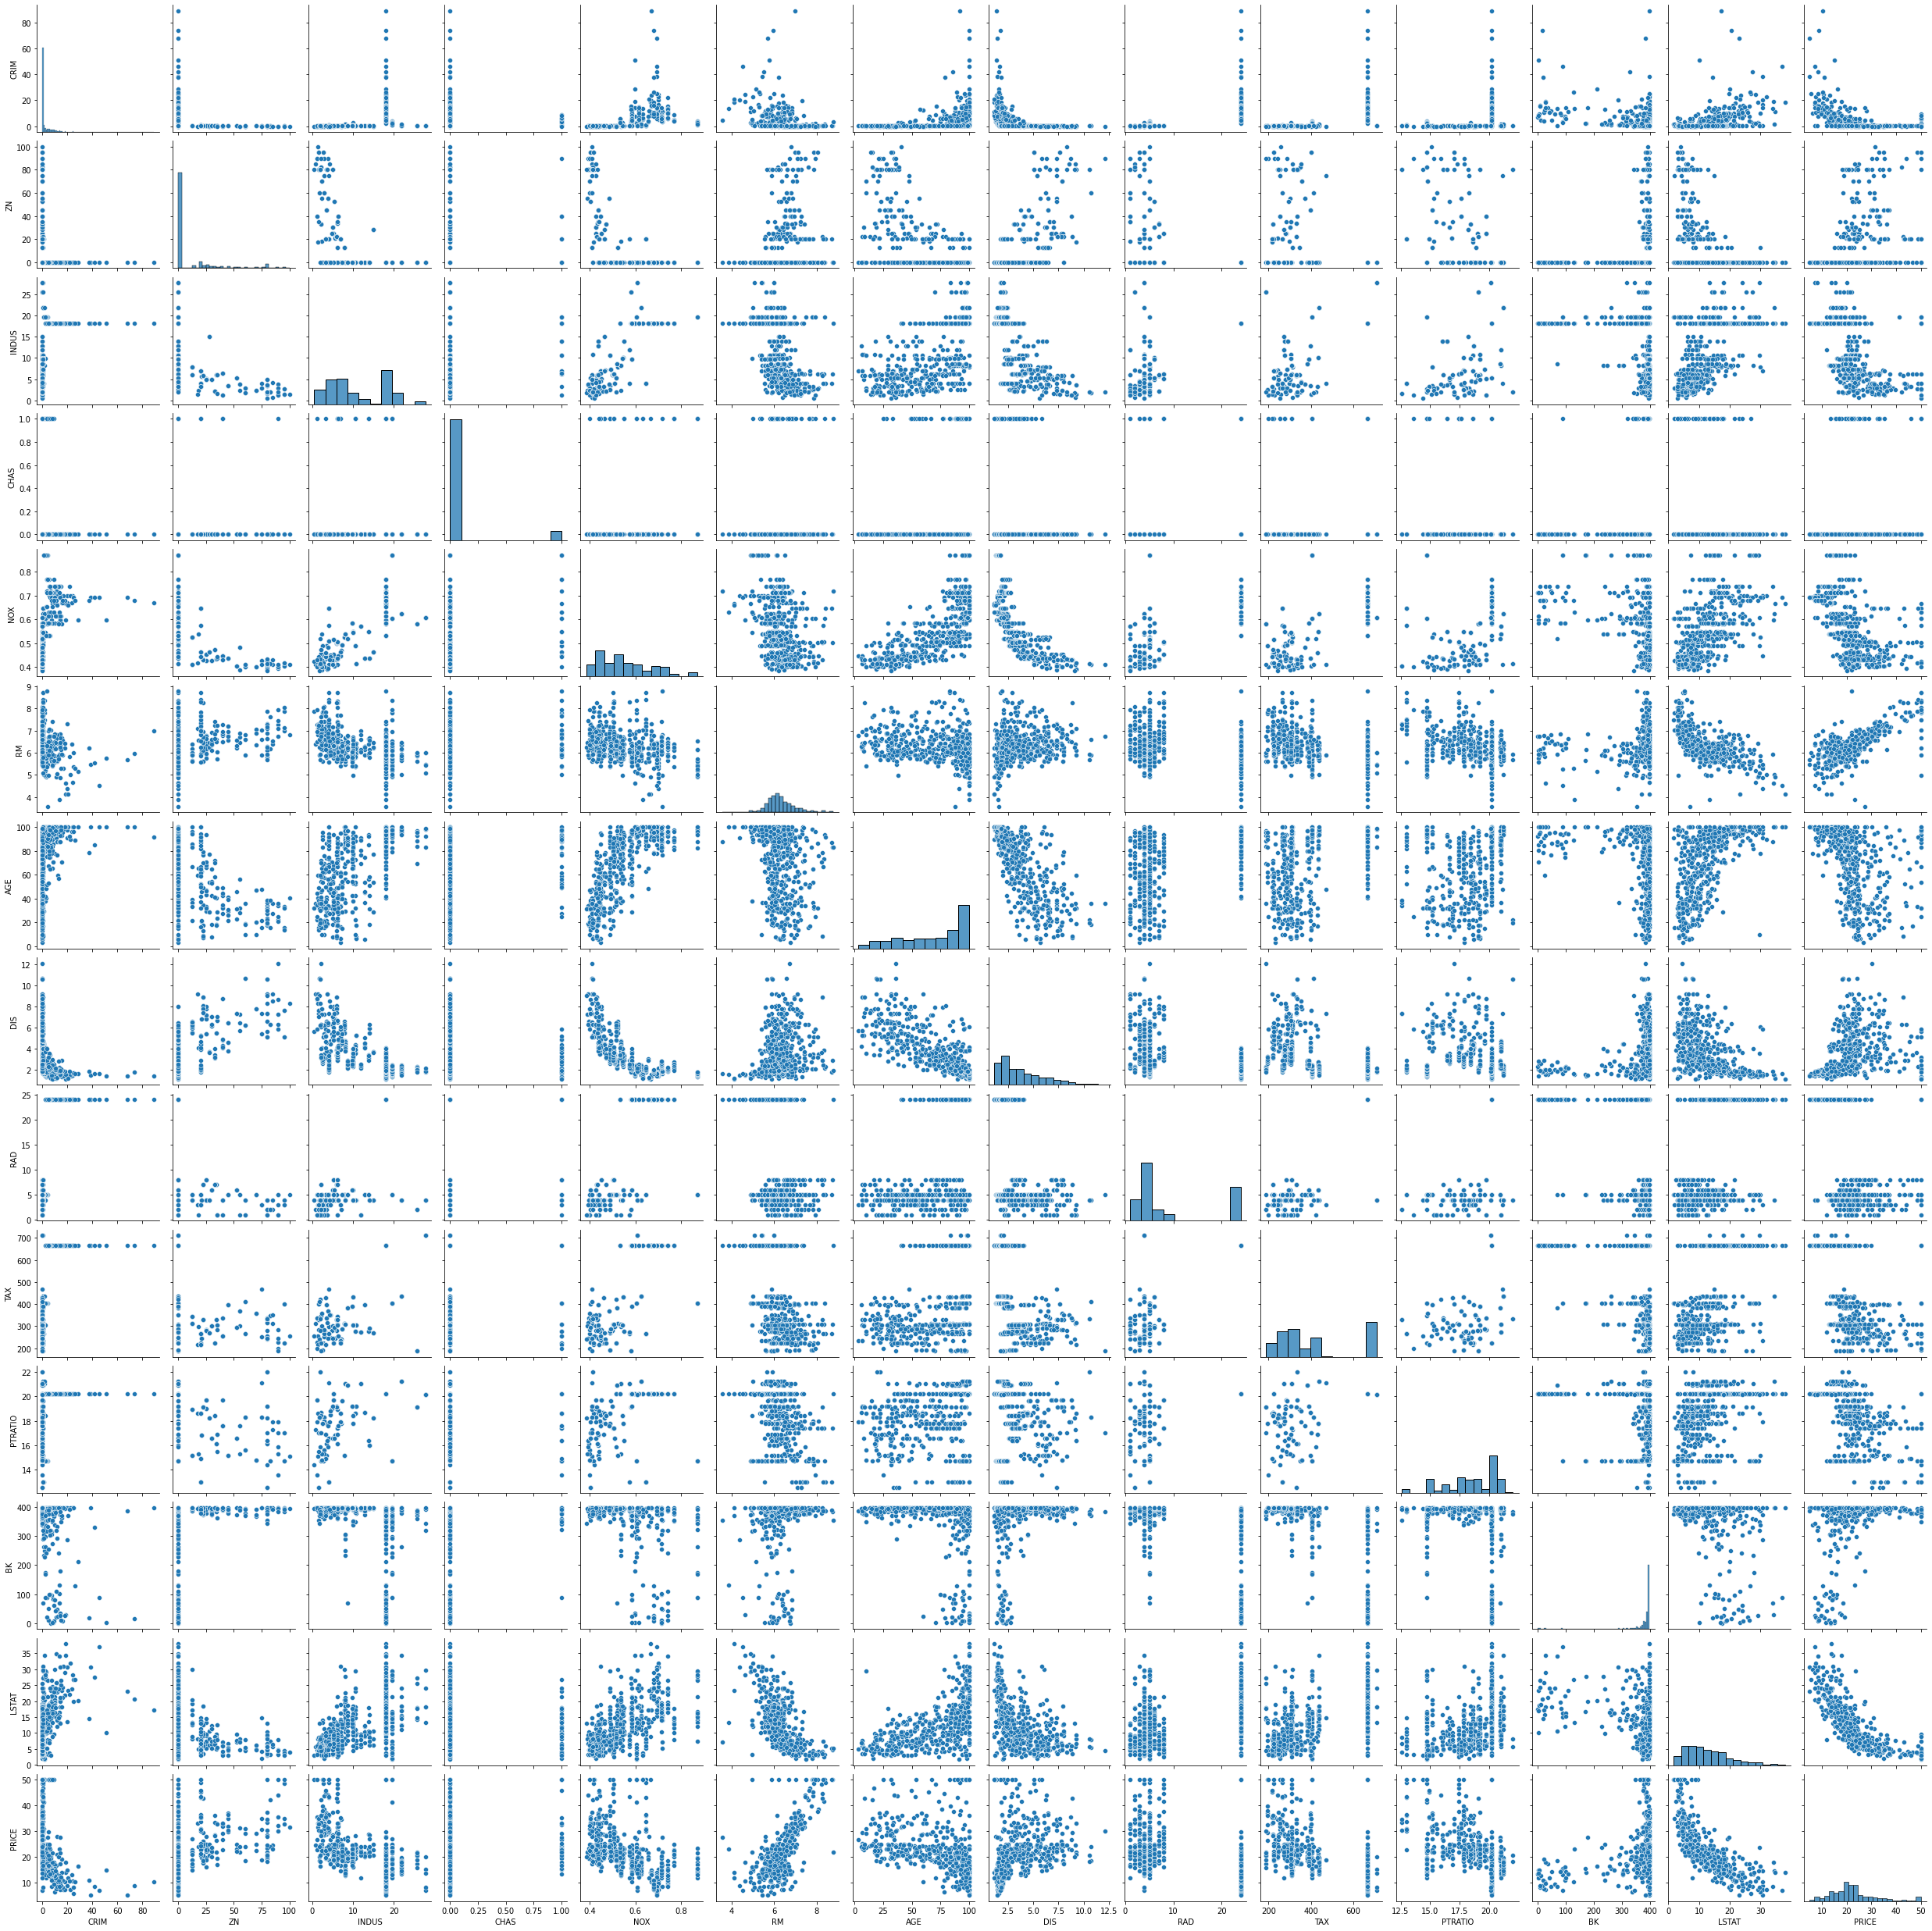

In [ ]:
sns.pairplot(data=df_houses) #this shows scatterplot of all vs all, we want only all vs PRICE (y_vars).


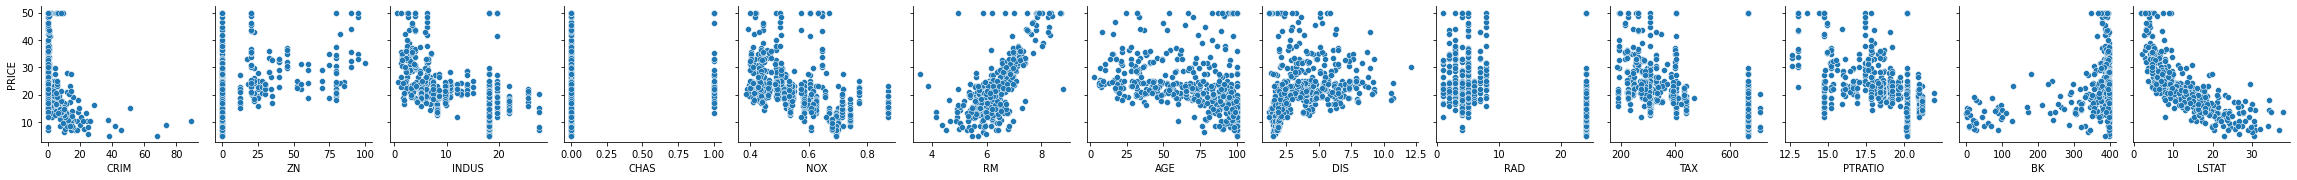

In [ ]:
sns.pairplot(data=df_houses,
    x_vars=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "BK", "LSTAT" ],
    y_vars=["PRICE"]
)

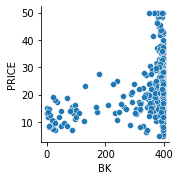

In [ ]:
sns.pairplot(data=df_houses,
    x_vars=[ "BK" ],
    y_vars=["PRICE"]
)

* There is any linear correlation between pairs of features? Which features? *hint: check the pairplot using the option corner=True*

*(Answer)*


* Are there any linear relation between the features and the PRICE? 

*(Answer)*
Podemos observar como existen algunas dependencias lineales e inversas. Entre el precio y las hectáreas industriales se podria decir que hay una dependenia lineal decreciente, cuanto menos industria más alto es el precio.
También se observa una distribución aprecida con la cantidad de gases NOX.
Hay una clara dependencia lineal creciente entre el precio y el número de habitaciones.
Por último, hay una proporción inversa entre el nivel de estatus de la población y el precio de la casa.

* Do a boxplot of all the features.

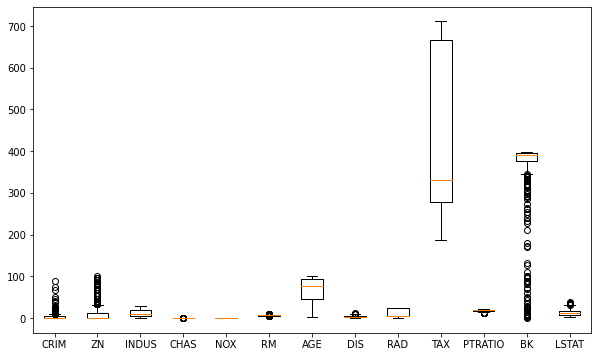

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
_ = ax.boxplot(dataset[:,:-1], labels=columns_names[:-1])

* Plot an histogram for each feature.

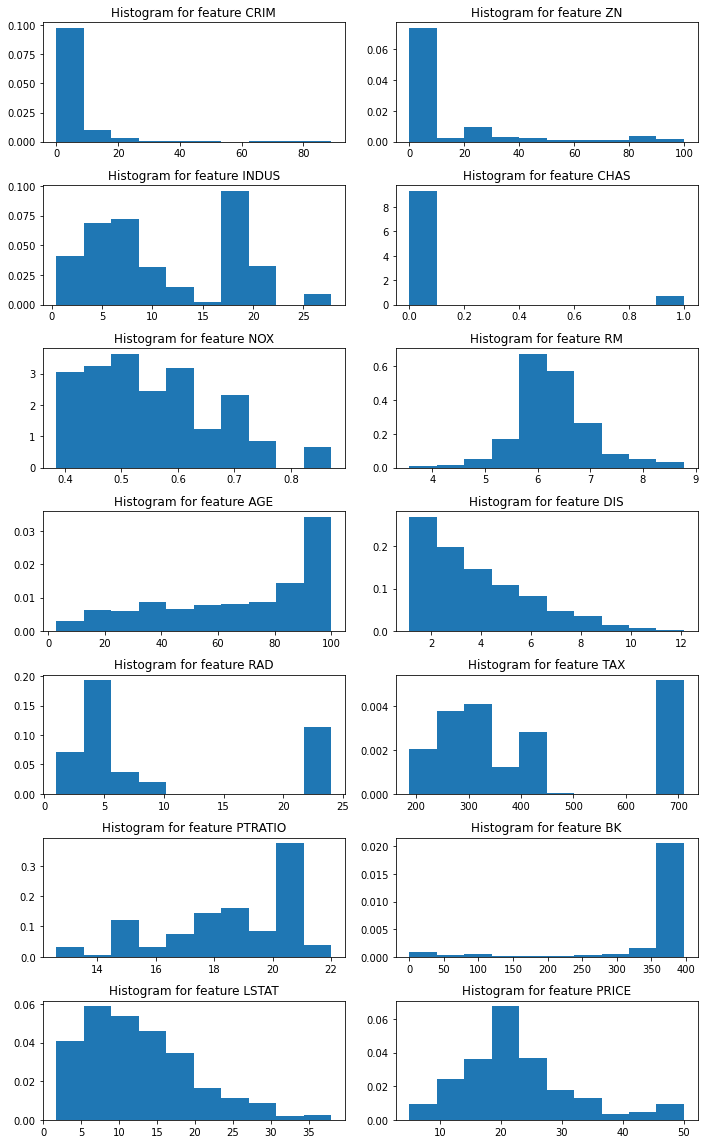

In [ ]:
fig, axes = plt.subplots(7,2, figsize=(10,16))
for i, column in enumerate(df_houses.columns):
  axes.flat[i].set_title(f"Histogram for feature {column}")
  plt.tight_layout()
  axes.flat[i].hist(df_houses[column], density=True)

* Are there any normal distributed variable?

*(Answer)*
Pdemos apreciar distribuciones normales en el precio, estatus de la población, TAX, Rad, numero de habitaciones y hectáreas industrializadas.

* Are there outliers? In which feature?

*(Answer)*
Encontrtamos casos fuera de su tendencia en la características: CRIM, ZN, CHAS y BK.

* Compute the following descriptive statistics for the variables **CRIM, INDUS, AGE and PRICE**:
1.   Mean.
2.   Standard deviation.
3.   Variance.
4.   Kurtosis.
5.   Skewness.
6.   Quartile 1.
7.   Median.
8.   Quartile 3
9.   Interquartile Range.



In [ ]:
def moment(x, n):
  mean = np.mean(x, axis=0)
  std = np.std(x, axis=0)
  res = 1/len(x)*np.sum(((x-mean)/std)**n, axis=0)
  return res

In [ ]:
print(f"Means: {features.mean(axis=0)}")
print(f"Std: {features.std(axis=0)}")
print(f"Var: {features.var(axis=0)}")
print(f"Kurtosis: {moment(features,4)}")
print(f"Skewness: {moment(features,3)}")
print(f"Quartile 1: {np.quantile(features, 0.25, axis=0)}")
print(f"Quartile 2 or Median: {np.quantile(features, 0.5, axis=0)}")
print(f"Quartile 3: {np.quantile(features, 0.75, axis=0)}")
print(f"IQR: {np.quantile(features, 0.75, axis=0) - np.quantile(features, 0.25, axis=0)}")

Means: [  3.61352356  11.36363636  11.13677866   0.06916996   0.55469506
   6.28463439  68.57490119   3.79504269   9.54940711 408.23715415
  18.4555336  356.67403162  12.65306324]
Std: [  8.59304135  23.29939569   6.85357058   0.25374293   0.11576312
   0.70192251  28.12103257   2.10362836   8.69865112 168.37049504
   2.16280519  91.20460745   7.13400164]
Var: [   73.84035967   542.86183974    46.97142974     0.06438548
     0.0134011      0.49269522   790.79247282     4.42525226
    75.66653127 28348.62359981     4.6777263   8318.2804205
    50.89397935]
Kurtosis: [39.75278626  6.97994877  1.76678153 12.53145284  2.92413578  4.86102697
  2.02998607  3.47129857  2.1294795   1.85701512  2.70588362 10.14376929
  3.47654476]
Skewness: [ 5.20765239  2.21906306  0.29414628  3.39579929  0.72714416  0.40241467
 -0.59718559  1.00877876  1.00183349  0.66796827 -0.79994453 -2.88179835
  0.90377074]
Quartile 1: [  0.082045   0.         5.19       0.         0.449      5.8855
  45.025      2.10017

In [ ]:
c = [0,2,6]


for element in c:

  print("**********")
  print(f"FEATURE: {element} (0 = CRIM; 2 = INDUS; 6 = AGE)")
  print("**********")
  print(f"Means: {features.mean(axis=0)[element]}")
  print(f"Std: {features.std(axis=0)[element]}")
  print(f"Var: {features.var(axis=0)[element]}")
  print(f"Kurtosis: {moment(features,4)[element]}")
  print(f"Skewness: {moment(features,3)[element]}")
  print(f"Quartile 1: {np.quantile(features, 0.25, axis=0)[element]}")
  print(f"Quartile 2 or Median: {np.quantile(features, 0.5, axis=0)[element]}")
  print(f"Quartile 3: {np.quantile(features, 0.75, axis=0)[element]}")
  print(f"IQR: {np.quantile(features, 0.75, axis=0)[element] - np.quantile(features, 0.25, axis=0)[element]}")



**********
FEATURE: 0 (0 = CRIM; 2 = INDUS; 6 = AGE)
**********
Means: 3.613523557312254
Std: 8.59304135129577
Var: 73.84035966507905
Kurtosis: 39.75278626142283
Skewness: 5.207652387859716
Quartile 1: 0.08204499999999999
Quartile 2 or Median: 0.25651
Quartile 3: 3.6770825
IQR: 3.5950375
**********
FEATURE: 2 (0 = CRIM; 2 = INDUS; 6 = AGE)
**********
Means: 11.13677865612648
Std: 6.853570583390874
Var: 46.97142974152072
Kurtosis: 1.7667815284370618
Skewness: 0.2941462768441854
Quartile 1: 5.19
Quartile 2 or Median: 9.69
Quartile 3: 18.1
IQR: 12.91
**********
FEATURE: 6 (0 = CRIM; 2 = INDUS; 6 = AGE)
**********
Means: 68.57490118577076
Std: 28.121032570236867
Var: 790.7924728163227
Kurtosis: 2.0299860733596105
Skewness: -0.5971855948016143
Quartile 1: 45.025
Quartile 2 or Median: 77.5
Quartile 3: 94.07499999999999
IQR: 49.04999999999999


In [ ]:
# PRICE STATS
print("PRICE STATS")
print(f"Means: {response.mean(axis=0)}")
print(f"Std: {response.std(axis=0)}")
print(f"Var: {response.var(axis=0)}")
print(f"Kurtosis: {moment(response,4)}")
print(f"Skewness: {moment(response,3)}")
print(f"Quartile 1: {np.quantile(response, 0.25, axis=0)}")
print(f"Quartile 2 or Median: {np.quantile(response, 0.5, axis=0)}")
print(f"Quartile 3: {np.quantile(response, 0.75, axis=0)}")
print(f"IQR: {np.quantile(response, 0.75, axis=0) - np.quantile(response, 0.25, axis=0)}")

PRICE STATS
Means: 22.532806324110677
Std: 9.188011545278203
Var: 84.41955615616556
Kurtosis: 4.468628772274747
Skewness: 1.104810822864635
Quartile 1: 17.025
Quartile 2 or Median: 21.2
Quartile 3: 25.0
IQR: 7.975000000000001


* Plot a q-q plot for each feature.

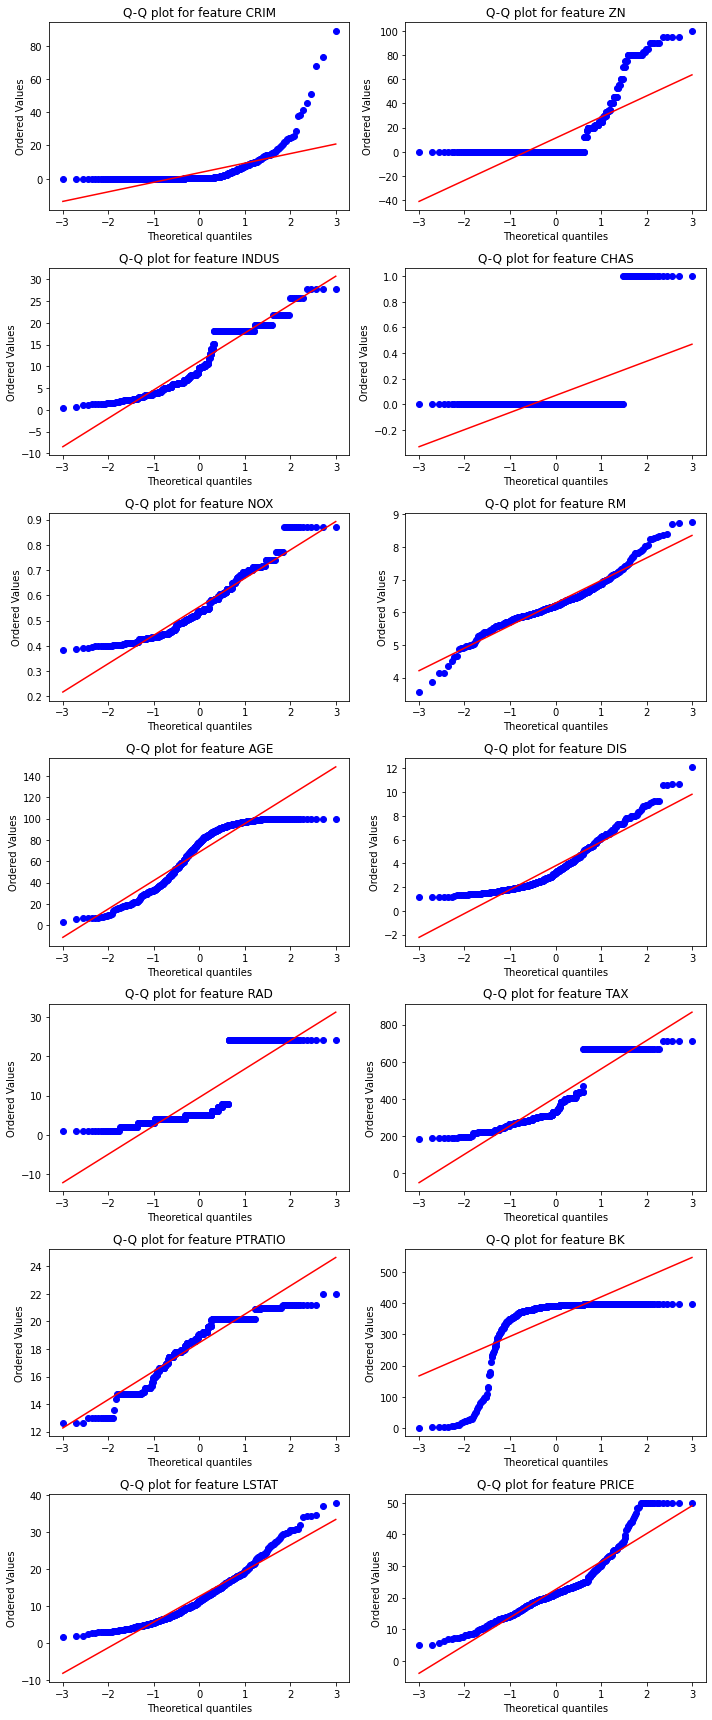

In [ ]:
import scipy.stats as stats
fig, axes = plt.subplots(7,2, figsize=(10,24))
for i, column in enumerate(df_houses.columns):
  ax = axes.flat[i]
  # add here the function to call the probplot
  stats.probplot(df_houses[column], dist="norm", plot=ax)
  ax.set_title(f"Q-Q plot for feature {column}")
  plt.tight_layout()

* Name one feature with a normal distribution. How we know that it follows a 
normal distribution by the information provided by the QQplot?

*(Answer)*
La característica que más se aproxima a una distribución normal es el numero de habtaciones de cada casa. El gráfico q-q, realiza una estandarización de cada muestra de cada característica y la compara con una distribución Gausiana ideal, cuanto más se aproximan las muestras a la distribución idel, más podemos asegurar que dicha caraterística tiene una distribución normal.

* Are there heavy tails / outliers? Name two features with outliers. How we know that there are outliers using the QQplot?

*(Answer)*
En todas las características se aprecian datos anómalos (outliers), sobretodo en los extremos. Aún así, los casos más exajerados se aprecian en la tasa de crimen, y la tasa de densidad de población afro.

* Compute the correlations between the features.

In [ ]:
corr = np.corrcoef(dataset.T)# put here the correlation matrix computation. Be aware that the 
# dataset is stored as a matrix of column vectors.
corr


array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171,
        -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,  0.58276431,
         0.28994558, -0.38506394,  0.45562148, -0.38830461],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371,
         0.31199059, -0.56953734,  0.66440822, -0.31194783, -0.31456332,
        -0.39167855,  0.17552032, -0.41299457,  0.36044534],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145,
        -0.39167585,  0.64477851, -0.70802699,  0.59512927,  0.72076018,
         0.38324756, -0.35697654,  0.60379972, -0.48372516],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281,
         0.09125123,  0.08651777, -0.09917578, -0.00736824, -0.03558652,
        -0.12151517,  0.04878848, -0.0539293 ,  0.17526018],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ,
        -0.30218819,  0.7314701 , -0.76923011,  0.61144056,  0.6680232 ,
         0.18893268, -0.38

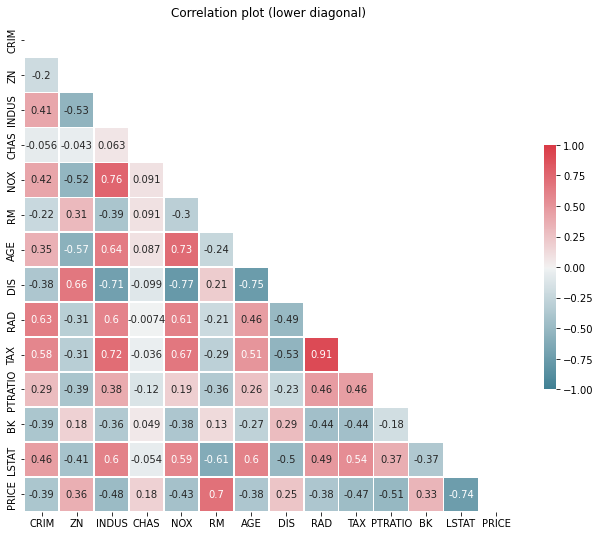

In [ ]:

try:
  mask = np.triu(np.ones_like(corr, dtype=bool))
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
              square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, 
              xticklabels=columns_names[:],
              yticklabels=columns_names[:])
  _ = ax.set_title("Correlation plot (lower diagonal)")
except Exception as e:
  print("No correct correlation matrix on the corr variable, no plot.")

* Compute the correlation of each feature with the response variable (PRICE).

In [ ]:
price_vs_all = corr[-1:,:]
price_vs_all



array([[-0.38830461,  0.36044534, -0.48372516,  0.17526018, -0.42732077,
         0.69535995, -0.37695457,  0.24992873, -0.38162623, -0.46853593,
        -0.50778669,  0.33346082, -0.73766273,  1.        ]])

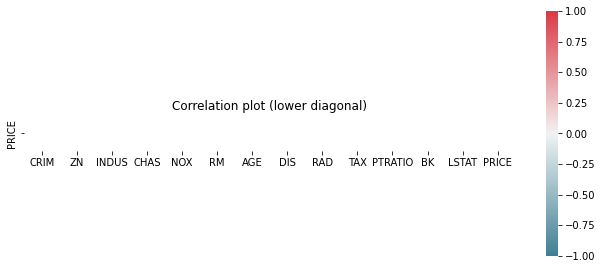

In [ ]:
try:
  mask = np.triu(np.ones_like(price_vs_all, dtype=bool))
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))
  # Generate a custom diverging colormap
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  ax = sns.heatmap(price_vs_all, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, annot=True,
              square=True, linewidths=.5, cbar_kws={"shrink": 0.5}, 
              xticklabels=columns_names[:],
              yticklabels=columns_names[13:14])
  _ = ax.set_title("Correlation plot (lower diagonal)")
except Exception as e:
  print("No correct correlation matrix on the corr variable, no plot.")

Answer the following questions from the information provided by the PCA on the dataset.

In [ ]:
## PCA
np.set_printoptions(suppress=True) # disabling cientific format
# 1: Remove the class column
dataset_pca = features
n_observations = dataset_pca.shape[0]
means = dataset_pca.mean(axis=0)
stds = dataset_pca.std(axis=0)
z_scores = np.divide(np.subtract(dataset_pca, means), stds) #broadcasting
# Check that our data is normalized:
print(f"Means: {z_scores.mean(axis=0)}")
print(f"Standard deviations: {z_scores.std(axis=0)}")
# Compute the correlation matrix
corr = np.matmul(z_scores.T, z_scores)/n_observations # Z = (X.T*X)/n
eigenvalues, eigenvectors = np.linalg.eig(corr) # Computing the eigenvalues and 
                                                #eigenvectors. Z = U*V*(1/U)
print(f"Eigenvalues: \n{eigenvalues}")
print(f"Eigenvectors: \n{eigenvectors}")
print("Each eigenvector corresponds to a principal component axis. We can now \
compute the variance captured by each eigenvector by dividing its \
corresponding eigenvalue by the sum of them all")

components_variance = []
for component_index, eigenv in enumerate(eigenvalues):
  print(f"Variance explained by component {component_index}")
  components_variance.append(eigenv/np.sum(eigenvalues))
  print(f"{components_variance[component_index]}")

Means: [-0.  0.  0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.]
Standard deviations: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Eigenvalues: 
[6.12684883 1.43327512 1.24261667 0.85757511 0.83481594 0.65740718
 0.53535609 0.39609731 0.06350926 0.27694333 0.16930298 0.18601437
 0.22023782]
Eigenvectors: 
[[-0.2509514   0.31525237 -0.24656649 -0.06177071  0.08215692  0.21965961
  -0.77760721 -0.15335048 -0.0459523  -0.26039028  0.08676107  0.10964435
  -0.01936913]
 [ 0.25631454  0.3233129  -0.29585782 -0.12871159  0.32061699  0.3233881
   0.27499628  0.40268031  0.08091897 -0.35813749 -0.07142528 -0.26275629
  -0.26752723]
 [-0.34667207 -0.11249291  0.01594592 -0.01714571 -0.00781119  0.0761379
   0.33957645 -0.17393172  0.25107654 -0.64441615 -0.11319963  0.30316943
   0.36353226]
 [-0.00504243 -0.45482914 -0.28978082 -0.81594136  0.08653094 -0.16749014
  -0.07413621  0.02466215 -0.03592171  0.01372777 -0.00398268 -0.01392667
   0.00618184]
 [-0.34285231 -0.21911553 -0.12096411  0.12822614  

* What is the number of components needed in order to explain up to 80% of the information of the dataset?

In [ ]:
count = 0
acumulate_variance = 0
for i in range(13):
  count = i
  acumulate_variance = components_variance[i]+acumulate_variance
  print(f"Con varianza acumulada de la variable: {count} se consigue explicar el: {acumulate_variance*100} % de la información del conjunto")

Con varianza acumulada de la variable: 0 se consigue explicar el: 47.12960635727459 % de la información del conjunto
Con varianza acumulada de la variable: 1 se consigue explicar el: 58.1547996048626 % de la información del conjunto
Con varianza acumulada de la variable: 2 se consigue explicar el: 67.71338939748559 % de la información del conjunto
Con varianza acumulada de la variable: 3 se consigue explicar el: 74.31012099832175 % de la información del conjunto
Con varianza acumulada de la variable: 4 se consigue explicar el: 80.73178205045912 % de la información del conjunto
Con varianza acumulada de la variable: 5 se consigue explicar el: 85.7887603227504 % de la información del conjunto
Con varianza acumulada de la variable: 6 se consigue explicar el: 89.90688406240483 % de la información del conjunto
Con varianza acumulada de la variable: 7 se consigue explicar el: 92.9537864813905 % de la información del conjunto
Con varianza acumulada de la variable: 8 se consigue explicar el: 9

* Perform k-means using different numbers of clusters (k). Compute the Calinski-Harabasz index for each number of clusters considered and interpret the configuration in which the Calinski-Harabasz index is maximum.

The Calinski-Harabasz is computed as the ratio between the variance between clusters and variance within each cluster.
$\frac{SS_B}{SS_W}$

In [ ]:
# k-means
def kmeans(num_clusters):
  k = num_clusters # Number of desired clusters
  #Forgy method initialization: Take k random observations of our data.
  init_means_index = np.random.randint(0,dataset.shape[0], size=k)
  means = dataset[init_means_index,:]
  cluster_assigned = np.zeros(dataset.shape[0])
  iteration = 0
  while(True):
    iteration = iteration + 1
    # Assign each point to a cluster based on the min euclidean distance with 
    # the means
    distances_matrix = []
    for k_index in range(k):
      distances_matrix.append(np.sum(np.power(np.subtract(dataset, means[k_index]),2), axis=1))
    last_assignation = cluster_assigned
    cluster_assigned=np.argmin(np.array(distances_matrix), axis=0)
    # Update the means values
    for k_index in range(k):
      mask = (cluster_assigned==k_index)
      means[k_index] = dataset[mask].mean(axis=0)
    if (cluster_assigned==last_assignation).all():
      break
  return(cluster_assigned)

In [ ]:
# Use this code to find the number of clusters with maximum score.
from sklearn.metrics import calinski_harabasz_score
num_clusters = 4
labels = kmeans(num_clusters)
calinski_harabasz_score(dataset, labels)


1621.8959468331652

* (Optional) Using the number of clusters with maximum Calinski Harabasz score, reduce the dataset using PCA to a projection of its TWO principal components, plot the projected dataset using as colors the labels of the clusters. What are the characteristics of each cluster that can be observed from the plot and the different information extracted during the data exploration (all the previous exercises).